In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import matlab
import matlab.engine
engine = matlab.engine.start_matlab() # Start MATLAB process
engine.sqrt(2.)

1.4142135623730951

In [32]:
model = load_model("C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\models\\my_model34_mix.h5")

### test dataset wav

In [265]:
f=open('C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\dataset\\params.txt')
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
data_y=[];
for line in f:
    data_y.append(line.split())
    data_y[-1]=data_y[-1][2:]
    for i in range(5):
        data_y[-1][i]=(float(data_y[-1][i])-range_param[i][0])/(range_param[i][1]-range_param[i][0])
data_y=np.array(data_y)


In [274]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\dataset\\wav\\1_MixDown.wav", sr=None, mono=False)
plt.plot([i/fs for i in range(len(wave_data))],wave_data)
plt.xlim([0,1])


print(fs)
N=150
wave_bin=int(fs*0.4) #400ms window
wave_step=int(fs*0.05) #50ms step
tension=[]
for i in range(N):
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])

    #plt.plot([j/fs for j in range(len(t))],t)

44100
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127,

[0.27912724018096924, 0.28495001792907715, 0.26043838262557983, 0.4464658796787262, 0.31321558356285095, 0.3635461926460266, 0.33040329813957214, 0.6497128009796143, 0.30283409357070923, 0.2902361750602722, 0.5352509617805481, 0.43787920475006104, 0.271309494972229, 0.21733707189559937, 0.23102375864982605, 0.13300371170043945, 0.2341499626636505, 0.4680676758289337, 0.5561643838882446, 0.38698381185531616, 0.48935142159461975, 0.5471820831298828, 0.5297093987464905, 0.6383845806121826, 0.4996756911277771, 0.6985124349594116, 0.306733101606369, 0.339603066444397, 0.28099000453948975, 0.31148090958595276, 0.7202408313751221, 0.6202632784843445, 0.815682053565979, 0.8012532591819763, 0.40096041560173035, 0.3677245080471039, 0.3878340423107147, 0.6468279361724854, 0.8625630736351013, 0.8313391208648682, 0.8450908660888672, 0.48348936438560486, 0.41577666997909546, 0.6046712398529053, 0.41258490085601807, 0.2541903853416443, 0.15571725368499756, 0.07299423217773438, 0.3214094638824463, 0.2

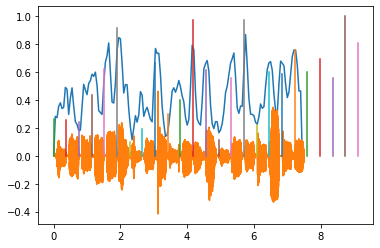

In [276]:
print(tension)
tt=[0]*len(tension)
for i in range(1,len(tension)-1):
    tt[i]=np.mean(tension[i-1:i+1])
plt.plot([i*0.05 for i in range(N)],tt)
t=wave_data[0:wave_step*N]
plt.plot([i/fs for i in range(wave_step*N)],t)
for i in range(25):
    plt.plot([i*0.38,i*0.38],[0,data_y[i,0]])

8.538391659694387
31.485861738652503
(127, 128)


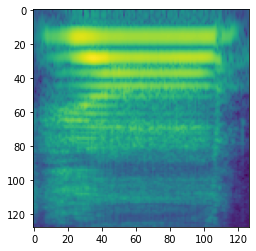

In [246]:
'''
mel_spect=engine.mel(matlab.double(t.tolist()))
mel_spect=np.transpose(mel_spect)
mel_spect=np.log(mel_spect)+40
print(np.min(mel_spect))
print(np.max(mel_spect))
print(np.shape(mel_spect))
plt.imshow(np.transpose(mel_spect))
'''

### test generated wav

44100
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)


d:\software\python36x64\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 

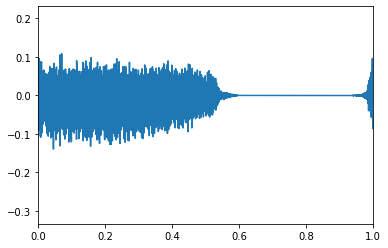

In [18]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\zhangli_min_0.wav", sr=None, mono=False)
plt.plot([i/fs for i in range(len(wave_data))],wave_data)
plt.xlim([0,1])

print(fs)
N=110
wave_bin=int(fs*0.402) #400ms window
wave_step=int(fs*0.05) #50ms step
tension=[]
breathiness=[]
voicing=[]
gender=[]
toneshift=[]
for i in range(N):
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])
    breathiness.append(t_pred[1])
    voicing.append(t_pred[2])
    gender.append(t_pred[3])
    toneshift.append(t_pred[4])
    #plt.plot([j/fs for j in range(len(t))],t)
    
    

[0.24220389127731323, 0.2604885399341583, 0.257561057806015, 0.21031540632247925, 0.3107030987739563, 0.2755405306816101, 0.15151232481002808, 0.1620682179927826, 0.24918371438980103, 0.1725374460220337, 0.23179152607917786, 0.39540982246398926, 0.4767260253429413, 0.26134729385375977, 0.21789735555648804, 0.29022571444511414, 0.3617936968803406, 0.38974958658218384, 0.37047630548477173, 0.2474633753299713, 0.20745784044265747, 0.26680466532707214, 0.24869555234909058, 0.3420344591140747, 0.32027551531791687, 0.23420894145965576, 0.18116548657417297, 0.16851890087127686, 0.11291912198066711, 0.136342853307724, 0.3294040560722351, 0.43561339378356934, 0.5751978754997253, 0.3975619375705719, 0.22663840651512146, 0.3036864399909973, 0.3706088960170746, 0.47283729910850525, 0.42030033469200134, 0.3093070685863495, 0.3000066578388214, 0.29790136218070984, 0.3238096237182617, 0.3339771628379822, 0.3753204643726349, 0.2735758423805237, 0.19350558519363403, 0.14981141686439514, 0.1706683039665

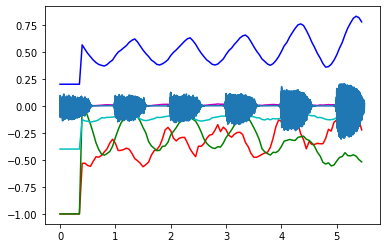

In [23]:
print(tension)
t1=[0]*len(tension)
t2=[0]*len(breathiness)
t3=[0]*len(voicing)
t4=[0]*len(gender)
t5=[0]*len(toneshift)
for i in range(8,len(tension)):
    t1[i]=np.mean(tension[i-8:i])
    t2[i]=np.mean(breathiness[i-8:i])
    t3[i]=np.mean(voicing[i-8:i])
    t4[i]=np.mean(gender[i-8:i])
    t5[i]=np.mean(toneshift[i-8:i])
    
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
plt.plot([i*0.05 for i in range(N)],np.array(t1)*2-1,'r')
plt.plot([i*0.05 for i in range(N)],np.array(t2)*2-1,'g')
plt.plot([i*0.05 for i in range(N)],np.array(t3)*0.8+0.2,'b')
plt.plot([i*0.05 for i in range(N)],np.array(t4)*0.2-0.1,'m')
plt.plot([i*0.05 for i in range(N)],np.array(t5)*0.8-0.4,'c')
t=wave_data[0:wave_step*N]
plt.plot([i/fs for i in range(wave_step*N)],t)

### test human voice

In [34]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\wings.wav", sr=None, mono=False)
wave_data=wave_data[0,:]
#plt.plot([i/fs for i in range(44100*2)],wave_data)
#plt.xlim([0,1])

print(fs)
N=1550
wave_bin=int(fs*0.402) #400ms window
wave_step=int(fs*0.05) #50ms step
tension=[]
breathiness=[]
voicing=[]
gender=[]
toneshift=[]
for i in range(N):
    if (i*100/N)%5==0:
        print('%d'%(i/N*100)+'%')
        
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    #print(np.shape(t))
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect+1e-20)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    #print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])
    breathiness.append(t_pred[1])
    voicing.append(t_pred[2])
    gender.append(t_pred[3])
    toneshift.append(t_pred[4])
    #plt.plot([j/fs for j in range(len(t))],t)
    
    

44100
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


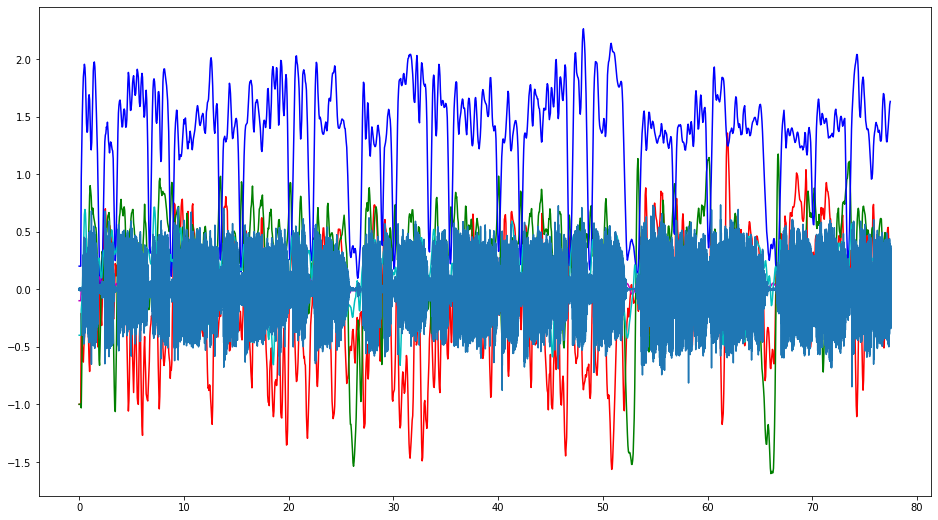

In [35]:
#print(tension)
t1=[0]*len(tension)
t2=[0]*len(breathiness)
t3=[0]*len(voicing)
t4=[0]*len(gender)
t5=[0]*len(toneshift)
for i in range(4,len(tension)):
    t1[i]=np.mean(tension[i-4:i])
    t2[i]=np.mean(breathiness[i-4:i])
    t3[i]=np.mean(voicing[i-4:i])
    t4[i]=np.mean(gender[i-4:i])
    t5[i]=np.mean(toneshift[i-4:i])
    
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
plt.figure(figsize=(16,9))
plt.plot([i*0.05 for i in range(N)],np.array(t1)*2-1,'r')
plt.plot([i*0.05 for i in range(N)],np.array(t2)*2-1,'g')
plt.plot([i*0.05 for i in range(N)],np.array(t3)*0.8+0.2,'b')
plt.plot([i*0.05 for i in range(N)],np.array(t4)*0.2-0.1,'m')
plt.plot([i*0.05 for i in range(N)],np.array(t5)*0.8-0.4,'c')
t=wave_data[0:wave_step*N]
plt.plot([i/fs for i in range(wave_step*N)],t)

In [40]:
f=open("C:\\Users\\Lenovo\\Desktop\\autocover_test\\param.txt","w")
i=0
while i<len(tension):
    f.write(str.format('%.3f '%np.tan((t1[i]-0.5)/1.25)))
    f.write(str.format('%.3f '%(t2[i]*2-1)))
    f.write(str.format('%.3f '%(t3[i]/np.max(t3)*0.8+0.2)))
    
    f.write(str.format('%.3f '%(t4[i]*0.2-0.1)))
    f.write(str.format('%.3f '%(t5[i]*800-400)))
    f.write(str.format('%.3f\n'%(i*0.05)))
    i=i+1
f.close()